<a href="https://colab.research.google.com/github/ParasNandwani/matplotlib/blob/master/BarChartRaceMatplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Python Libraries**


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [0]:

df = pd.read_csv('https://gist.githubusercontent.com/johnburnmurdoch/4199dbe55095c3e13de8d5b2e5e5307a/raw/fa018b25c24b7b5f47fd0568937ff6c04e384786/city_populations', 
                 usecols=['name', 'group', 'year', 'value'])

In [3]:
df.head()

,name,group,year,value
0,Agra,India,1575,200.0
1,Agra,India,1576,212.0
2,Agra,India,1577,224.0
3,Agra,India,1578,236.0
4,Agra,India,1579,248.0


In [5]:
current_year=2018
dff=(df[df['year'].eq(current_year)].sort_values(by='value',ascending=True).head(10))
dff

,name,group,year,value
2537,Karachi,Asia,2018,18185.2
4327,New York,North America,2018,18713.0
1336,Dhaka,Asia,2018,19632.6
1195,Cairo,Middle East,2018,19849.6
4679,Osaka,Asia,2018,20409.0
3574,Mexico City,Latin America,2018,21520.4
5445,Sao Paulo,Latin America,2018,21697.8
3748,Mumbai,India,2018,22120.0
689,Beijing,Asia,2018,22674.2
5547,Shanghai,Asia,2018,25778.6


<BarContainer object of 10 artists>

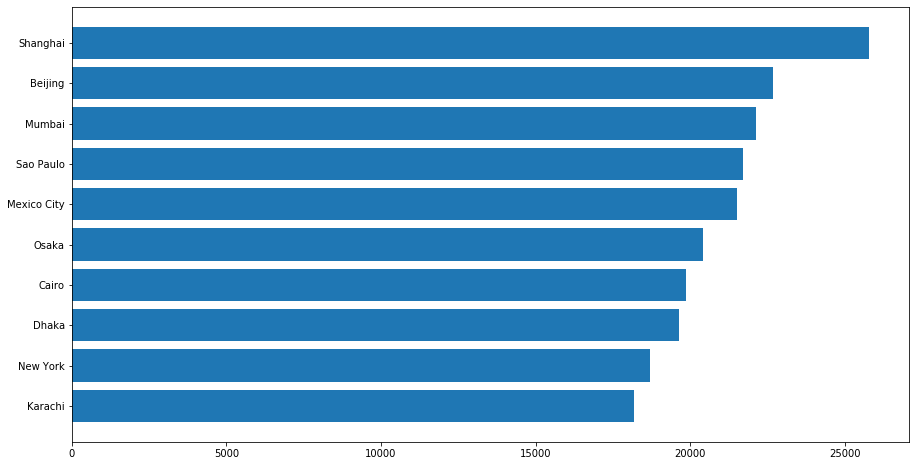

In [7]:
fig,ax=plt.subplots(figsize=(15,8))
ax.barh(dff['name'],dff['value'])

In [0]:
colors = dict(zip(
    ['India', 'Europe', 'Asia', 'Latin America',
     'Middle East', 'North America', 'Africa'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50']
))

In [16]:
group_lk=df.set_index('name')['group'].to_dict()
group_lk

{'Agra': 'India',
 'Ahmedabad': 'India',
 'Amsterdam': 'Europe',
 'Ayutthaya': 'Asia',
 'Beijing': 'Asia',
 'Berlin': 'Europe',
 'Bijapur': 'India',
 'Birmingham': 'Europe',
 'Boston': 'North America',
 'Buenos Aires': 'Latin America',
 'Cairo': 'Middle East',
 'Chicago': 'North America',
 'Cuttack': 'India',
 'Delhi': 'India',
 'Dhaka': 'Asia',
 'Edirne': 'Europe',
 'Esfahan': 'Middle East',
 'Fez': 'Middle East',
 'Gauda': 'India',
 'Guangzhou': 'Asia',
 'Hangzhou': 'Asia',
 'Istanbul': 'Europe',
 'Karachi': 'Asia',
 'Kolkatta': 'India',
 'Kyoto': 'Asia',
 'Lisbon': 'Europe',
 'London': 'Europe',
 'Los Angeles': 'North America',
 'Lucknow': 'India',
 'Manchester': 'Europe',
 'Mashhad': 'Middle East',
 'Mexico City': 'Latin America',
 'Moscow': 'Europe',
 'Mumbai': 'India',
 'Nanjing': 'Asia',
 'Naples': 'Europe',
 'New York': 'North America',
 'Osaka': 'Asia',
 'Paris': 'Europe',
 'Pegu': 'Asia',
 'Philadelphia': 'North America',
 'Rio de Janeiro': 'Latin America',
 'Saint Petersburg

Text(1, 0.4, '2018')

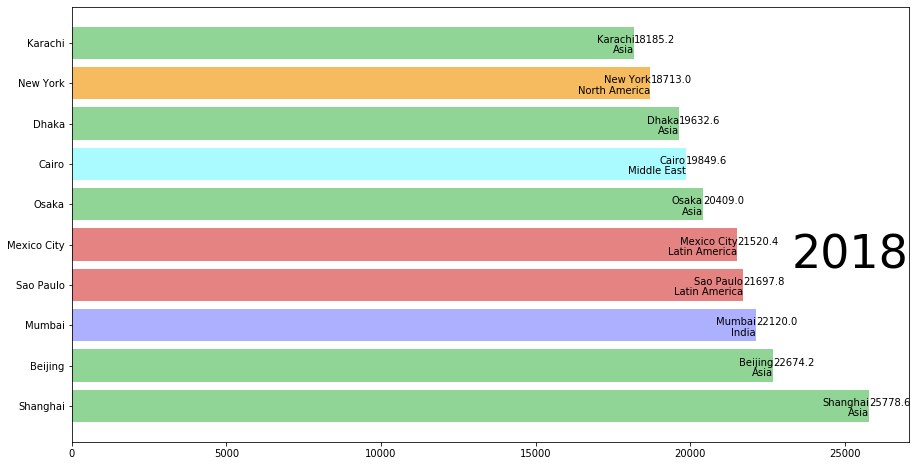

In [18]:
fig, ax = plt.subplots(figsize=(15, 8))
dff=dff[::-1]
ax.barh(dff['name'],dff['value'],color=[colors[group_lk[x]] for x in dff['name']])

for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: name
    ax.text(value, i-.25, group_lk[name],  ha='right')  # Asia: group name
    ax.text(value, i,     value,           ha='left')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

##Polish

In [0]:
def draw_barchart(year):
  dff=df[df['year'].eq(year)].sort_values(by='value',ascending=True).tail(10)
  ax.clear()
  ax.barh(dff['name'],dff['value'],color=[colors[group_lk[x]] for x in dff['name']])



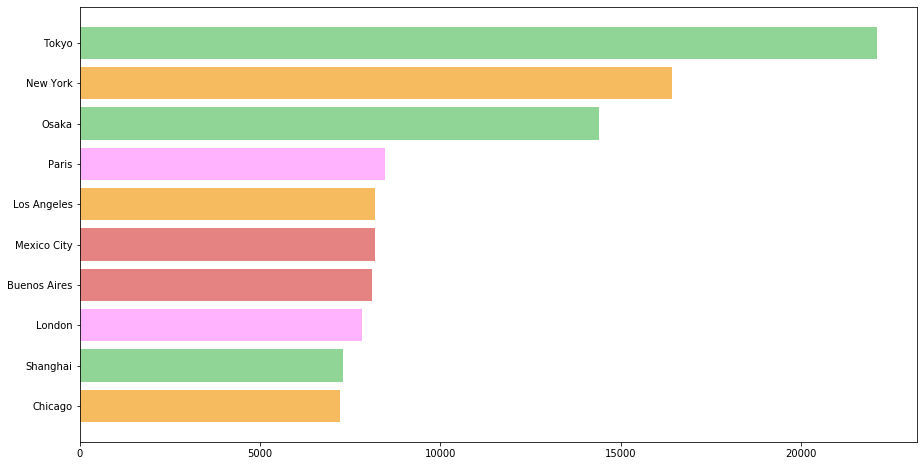

In [34]:
import matplotlib.animation as animation
from IPython.display import HTML
fig,ax=plt.subplots(figsize=(15,8))
animator=animation.FuncAnimation(fig,draw_barchart,frames=range(1968,2019))
HTML(animator.to_jshtml())